# 1. 数据增广

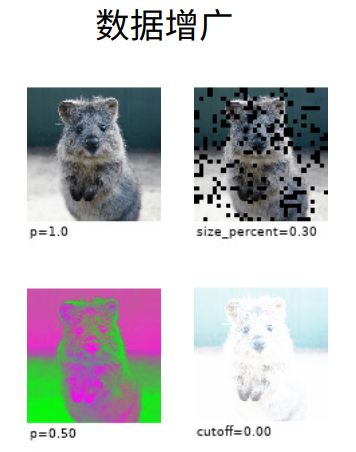

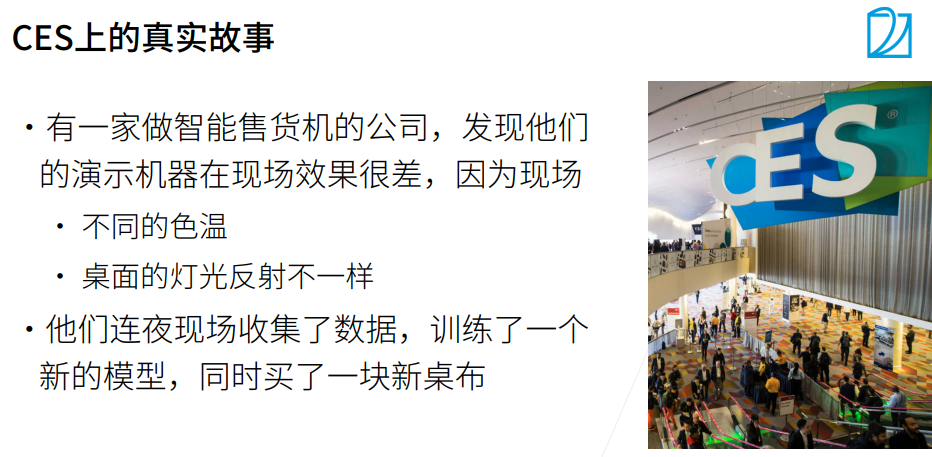

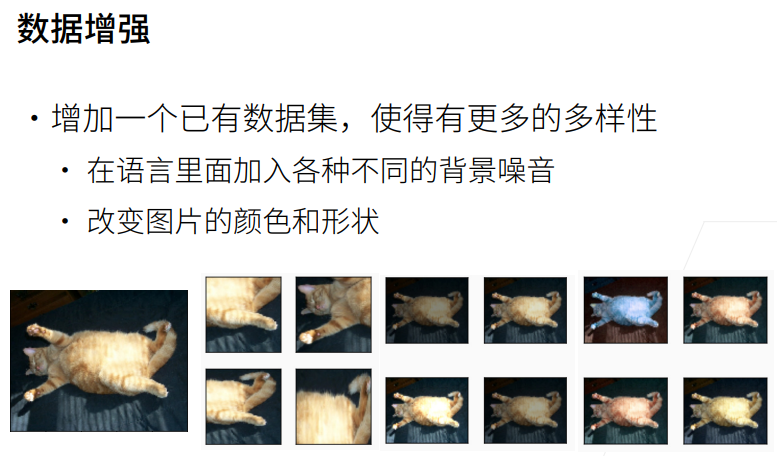

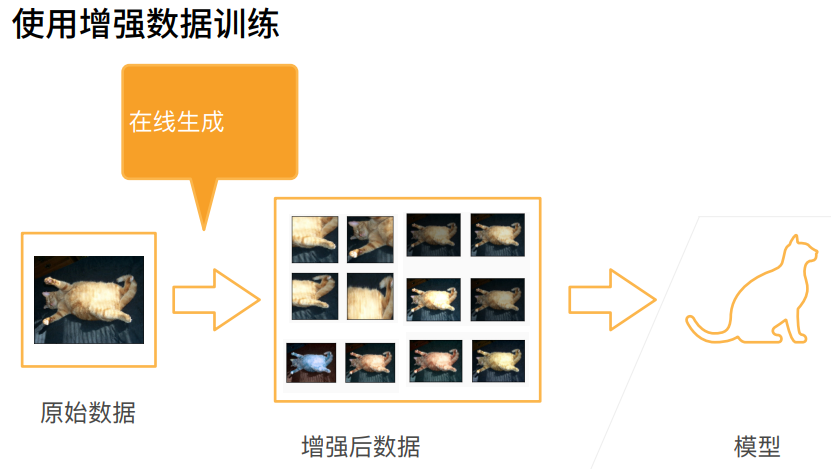

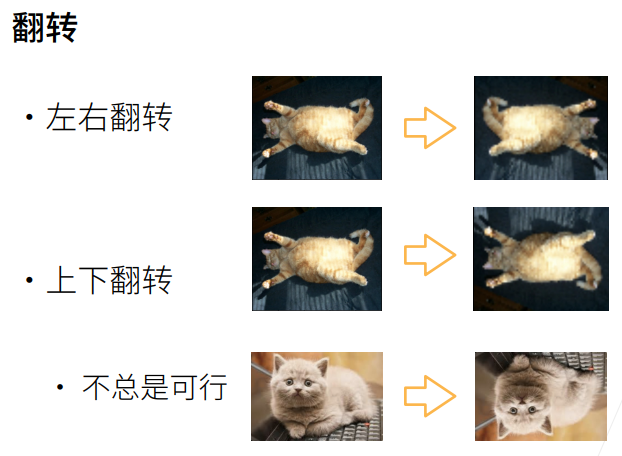

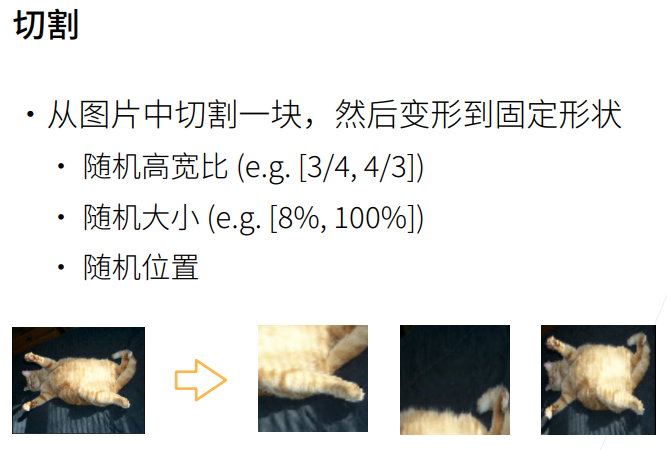

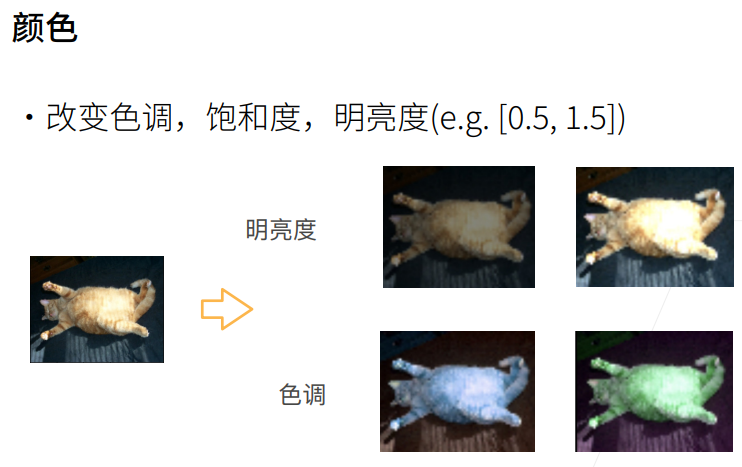

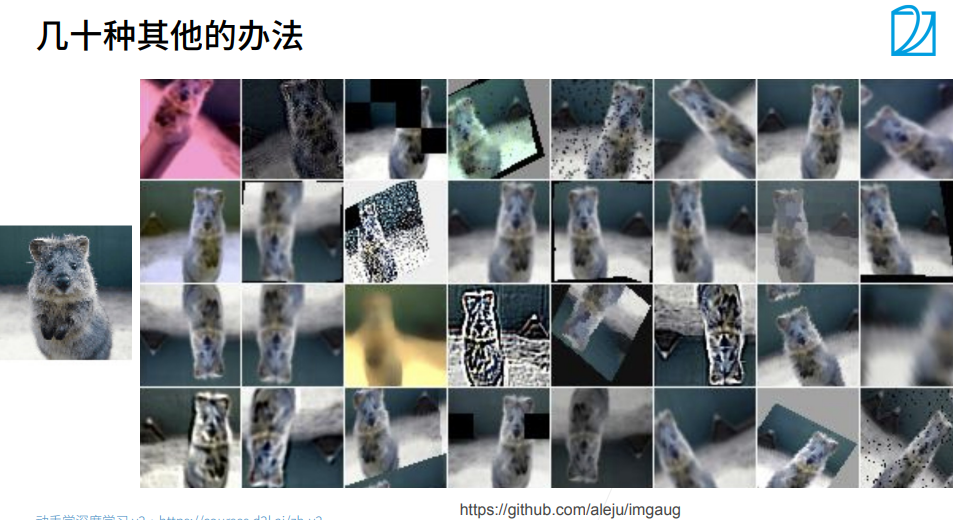

# 2. 总结

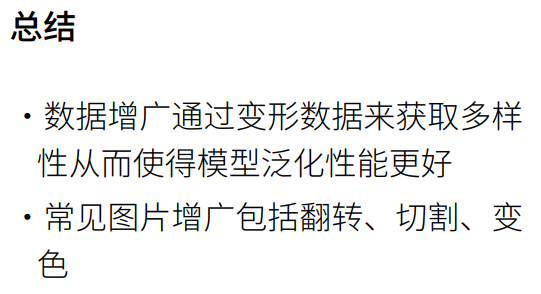

# 🎓 深度学习笔记：数据增广 (Data Augmentation)

> **核心概念**：一种“空手套白狼”的技术。通过对现有训练图片进行随机变换（翻转、裁剪、变色等），免费增加数据量，强制模型学习物体本质特征，防止过拟合。

---

## 1. 什么是数据增广？(What)

想象你是一名老师，在教学生（神经网络）认识什么是 **“狗”**。
你手里只有 **1 张** 金毛犬的照片，且照片里的狗是 **侧脸朝左**，站在 **亮得刺眼的绿草地** 上。

* **❌ 如果不做增广**：
    学生天天盯着这张图看，最后会形成偏见：*“只有脸朝左、背景是绿草地、很亮的东西，才是狗。”*
    考试时如果给一张脸朝右、或者在暗处的狗，他就不认识了。

* **✅ 使用数据增广**：
    你用代码把这张原图进行各种“折腾”：
    1.  **水平翻转**（变成脸朝右）。
    2.  **调低亮度**（模拟晚上的狗）。
    3.  **放大裁剪**（只看狗头）。
    
    虽然只有 1 张原图，但学生看到了 100 张形态各异的照片。他会明白：*“不管脸朝哪、不管亮还是暗，只要长得像这样，就是狗！”*

---

## 2. 具体怎么做？(How)

在 `torchvision` 中，我们通常使用 `transforms` 来实现。

### A. 翻转 (Flip)
* **操作**：左右镜像翻转。
* **代码**：`transforms.RandomHorizontalFlip()`
* **逻辑**：猫头朝左是猫，朝右也是猫。
* **⚠️ 注意**：**垂直翻转 (Vertical Flip)** 很少用！因为自然界中物体通常不会倒立（除非是卫星地图或显微镜图片）。

### B. 随机裁剪 (Random Crop)
* **操作**：随机切掉一部分，然后放大。
* **代码**：`transforms.RandomResizedCrop(224)`
* **逻辑**：迫使模型去关注**局部特征**（比如只看猫耳朵），而不是只看整体轮廓。

### C. 颜色抖动 (Color Jitter)
* **操作**：随机改变 **亮度(Brightness)**、**对比度(Contrast)**、**饱和度(Saturation)**、**色调(Hue)**。
* **代码**：`transforms.ColorJitter(brightness=0.5, contrast=0.5, ...)`
* **逻辑**：让模型明白，**颜色深浅和光照不重要，物体的形状才重要**。

---

## 3. 为什么要这么做？(Why)

1.  **省钱 (Expand Dataset)**：
    * 采集和标注几万张新图片成本极高。
    * 数据增广是**零成本**的，写几行代码，数据量瞬间翻倍。

2.  **防止过拟合 (Prevent Overfitting) [最重要]**：
    * 防止模型“死记硬背”背景（比如记住绿草地）。
    * 通过不断变换图像，逼迫模型学习**鲁棒 (Robust)** 的本质特征。

---

## 4. ⚠️ 新手铁律：训练 vs 测试

**原则：只在训练时“折腾”，考试时要“正经”！**

* **训练集 (Train)**：**开启增广**。给模型制造困难，让它见多识广。
* **测试集 (Test/Inference)**：**关闭增广**。只做最基本的标准化（ToTensor, Resize），给模型看最清晰的原图，评估真实水平。


# 1. 数据增广

(400, 500, 3)


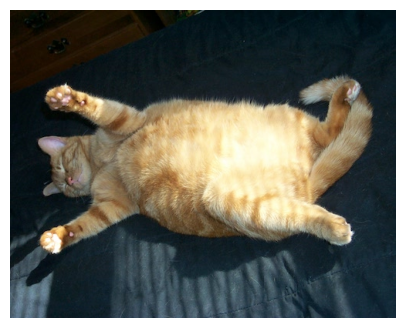

In [31]:
import torch
import matplotlib.pyplot as plt  
from torch import nn
from PIL import Image            
import torchvision
import numpy as np
import time
# 1. 读取图片 (使用 Python 标准图像库 PIL)
img = Image.open('D:\\深度学习\\200_李沐数据集\\01_Data\\02_cat.jpg') 

# 2. 设置画布大小 (可选)
plt.figure(figsize=(5, 4)) 

# 3. 显示图片
plt.imshow(img)
# 4. (可选) 去掉坐标轴，看起来更像一张纯图
tmp = np.array(img)
print(tmp.shape)
plt.axis('off') 

# 5. 正式把图画出来 (在某些编辑器里必须加这句才显示)
plt.show()

## 随机水平翻转

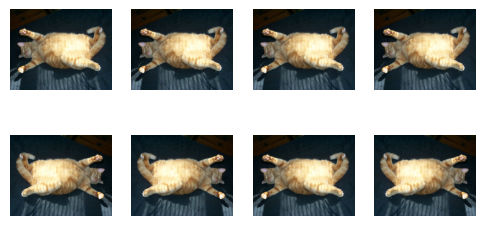

In [15]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    # ==========================================
    # 1. 生成增广后的图片列表
    # ==========================================
    # [语法]: 列表推导式 (List Comprehension)。
    # [作用]: 循环运行 `num_rows * num_cols` 次 (这里是8次)，
    # 每次都调用 aug(img) 对原图进行随机增广，把生成的 8 张新图存进列表 Y。
    Y = [aug(img) for _ in range(num_cols * num_rows)]
    # Python
    # [expression for item in iterable if condition]
    # expression: 最终放入列表的元素（可以是对 item 的加工）。
    # for item in iterable: 遍历对象。
    # if condition: （可选）过滤条件，只有满足条件的元素才会执行前面的表达式。
    
    # ==========================================
    # 2. 创建画布 (Canvas)
    # ==========================================
    # [语法]: 计算元组。
    # [作用]: 根据行数列数和缩放比例，算出一张大图的总宽和总高 (比如 6英寸 x 3英寸)。
    figsize = (num_cols * scale, num_rows * scale)
    
    # [语法]: 函数调用与解包赋值。
    # [作用]: plt.subplots 创建一个网格。
    # - fig: 整个大图的容器。
    # - axes: 一个包含所有小格子的数组 (numpy array)，这里是 2x4 的矩阵，存放着 8 个坐标轴对象。
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # ==========================================
    # 3. 循环画图
    # ==========================================
    # [语法]: zip() 函数配合 axes.flatten()。
    # [作用]: 
    # - axes.flatten(): 把 2x4 的矩阵“拍扁”成一个长条数组 (长度8)，方便循环。
    # - zip(...): 把“格子(ax)”和“图片(y)”一对一打包起来。
    # - enumerate(...): 顺便获取索引 i (虽然这里没用到，但习惯上常写)。
    for i,(ax,img) in enumerate(zip(axes.flatten(),Y)):
        
        # [语法]: 对象方法调用。
        # [作用]: 在当前这个小格子 (ax) 里显示图片 (y)。
        ax.imshow(img)
        
        # [语法]: 对象方法调用。
        # [作用]: 关闭坐标轴。因为看图片不需要看 x,y 轴的刻度 (0, 100, 200...)，关掉更清爽。
        ax.axis('off')
    
    # ==========================================
    # 4. 显示结果
    # ==========================================
    # [语法]: 函数调用。
    # [作用]: 正式把画好的图渲染到屏幕上 (在某些 IDE 中必须写这句才弹窗)。
    plt.show()

# 调用函数：水平随机翻转
# [语法]: 函数调用。
# [作用]: 传入原图和“随机水平翻转”的增广策略，查看效果。
apply(img, torchvision.transforms.RandomHorizontalFlip())

## 随机上下翻转

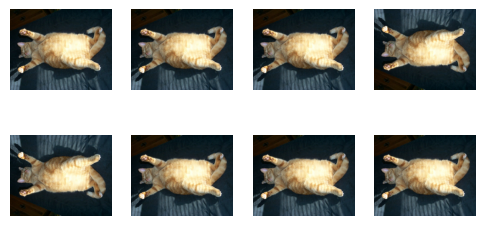

In [16]:
apply(img, torchvision.transforms.RandomVerticalFlip()) # 上下随机翻转

## 随机裁剪

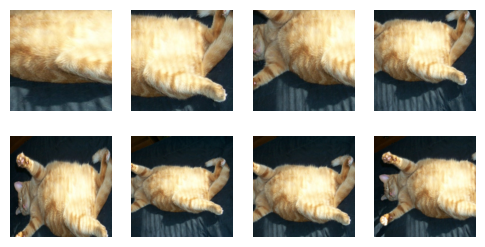

In [17]:
# ==========================================
# 1. 定义增广策略对象
# ==========================================
# [语法]: 类的实例化。
# 调用 torchvision.transforms 下的 RandomResizedCrop 类。
# 参数详解：
# - (200, 200): [必需参数] 最终输出的图片大小。不管你切下来多大一块，最后都会强制拉伸/压缩成 200x200 像素。
# - scale=(0.1, 1): [随机范围] 裁剪面积的比例。
#      这意味着：每次随机切下来的面积，最小是原图的 10% (0.1)，最大是原图的 100% (1)。
#      作用：模拟“远近”视角（切得小像是在看局部特写，切得大像是看全景）。
# - ratio=(0.5, 2): [随机范围] 裁剪区域的长宽比。
#      这意味着：切下来的矩形，最扁可以是 1:2 (0.5)，最瘦长可以是 2:1 (2)。
#      作用：模拟“拉伸”或不同角度的透视变形。
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), 
    scale=(0.1, 1), 
    ratio=(0.5, 2)
)

# ==========================================
# 2. 应用并展示
# ==========================================
# [语法]: 调用自定义函数 apply (假设你前面定义过它)。
# - img: 原始图片变量。
# - shape_aug: 把上面定义好的那个“变形规则”传进去。
# [作用]: 
# 拿着这个规则对 img 连续操作 8 次（因为 apply 里写了循环），
# 然后画出 8 张结果图，让你肉眼看看这些随机切出来的图长什么样。
apply(img, shape_aug)

## 随机更改图像的亮度（brightness）、对比度（constrast）、饱和度（saturation）和色调（hue）

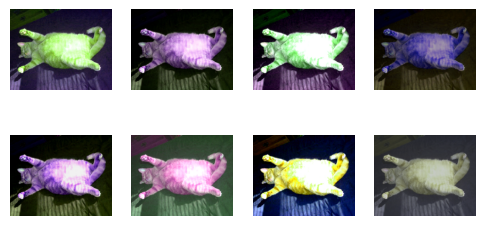

In [ ]:
# ==========================================
# 1. 定义颜色增广策略 (Color Jitter)
# ==========================================
# [语法]: 类的实例化。
# 调用 torchvision.transforms.ColorJitter 类。
# 参数详解 (所有参数 float 都是代表“抖动幅度”):
# - brightness=0.5 (亮度): 随机因子在 [1-0.5, 1+0.5] 即 [0.5, 1.5] 之间。
#    作用: 模拟有的图片曝光过度(亮)，有的曝光不足(暗)。
# - contrast=0.5 (对比度): 随机因子在 [0.5, 1.5] 之间。
#    作用: 模拟图片有的很鲜明，有的灰蒙蒙。
# - saturation=0.5 (饱和度): 随机因子在 [0.5, 1.5] 之间。
#    作用: 模拟颜色有的很浓艳，有的很淡。
# - hue=0.5 (色调): 随机因子在 [-0.5, 0.5] 之间。
#    作用: 模拟彻底偏色（比如图片整体偏红或偏蓝）。注意 hue 改变过大可能会让物体颜色失真(比如变成紫色的草)。
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, 
    contrast=0.5, 
    saturation=0.5, 
    hue=0.5
)

# ==========================================
# 2. 应用并展示
# ==========================================
# [语法]: 调用自定义函数 apply。
# [作用]: 
# 对原图 img 随机执行 8 次上面定义的“颜色抖动”。
# 你会看到出来的 8 张图，有的像是在中午拍的（亮），有的像是在傍晚拍的（暗/偏黄），有的像是老照片（对比度低）。
apply(img, color_aug)

##  结合多种图像增广方法 先随即水平翻转，再做颜色增广，再做形状增广

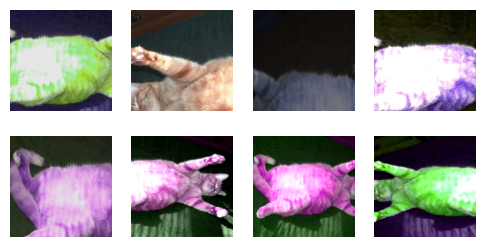

In [25]:
# ==========================================
# 1. 定义增广组合拳 (Compose)
# ==========================================
# [语法]: 类的实例化。
# 调用 torchvision.transforms.Compose 类。
# 参数: 接收一个列表 [...]，列表里装着你要执行的各种变换对象。
# [作用]: 
# 就像一个工厂流水线。
# 当图片进来时，它会按列表顺序依次执行：
# 第 1 步: RandomHorizontalFlip (先决定要不要左右翻转)
#      ↓
# 第 2 步: color_aug (再把颜色变得忽亮忽暗)
#      ↓
# 第 3 步: shape_aug (最后随机切一块下来并变形)
#      ↓
# 输出最终结果
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), 
    color_aug, 
    shape_aug
])

# ==========================================
# 2. 应用并展示
# ==========================================
# [语法]: 调用自定义函数 apply。
# [作用]: 
# 对原图 img 随机执行 8 次这套“组合拳”。
# 结果是非常疯狂的：你会看到图片既被翻转了，颜色也变了，形状也变了。
# 每一张图都长得完全不一样，这极大地丰富了数据集的多样性。
apply(img, augs)

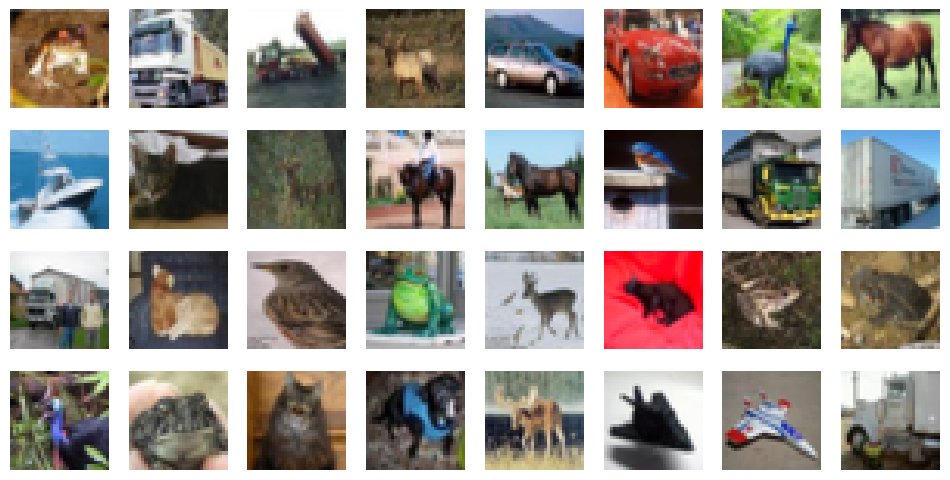

In [ ]:
# ==========================================
# 1. 下载并加载数据集
# ==========================================
# [语法]: 实例化 CIFAR10 数据集对象。
# [作用]: 
# - root: 指定数据存放的文件夹。
# - train=True: 下载训练集 (50000张)，False 则下载测试集 (10000张)。
# - download=True: 如果文件夹里没有数据，自动从网上下载；如果有，直接读取。
all_images = torchvision.datasets.CIFAR10(
    train=True, 
    root=r'D:\深度学习\200_李沐数据集\01_Data\03_CIFAR10'
)

# ==========================================
# 2. 准备要画的数据
# ==========================================
# [语法]: 列表推导式 (List Comprehension)。
# [作用]: 
# all_images[i] 返回的是一个元组 (image, label)。
# 我们只需要图片，所以取 [0]。
# 循环 32 次，把前 32 张图片拿出来放到一个列表里。
imgs_to_show = [all_images[i][0] for i in range(32)]

# ==========================================
# 3. 创建画布网格 
# ==========================================
# [配置]: 设定行数、列数、缩放比例
num_rows, num_cols = 4, 8
scale = 1.5 
figsize = (num_cols * scale, num_rows * scale) # 自动计算大图尺寸

# [语法]: plt.subplots 创建子图。
# [作用]: 
# - fig: 整个大图容器。
# - axes: 一个 4x8 的矩阵，里面装着 32 个小格子的坐标轴对象。
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

# ==========================================
# 4. 循环填充图片
# ==========================================
# [语法]: zip() 打包 + axes.flatten() 展平。
# [作用]: 
# axes 本来是二维矩阵，用 flatten() 变成一维长条，方便和 imgs_to_show 一一配对。
# 这里的 ax 是画框，img 是图片。
for ax, img in zip(axes.flatten(), imgs_to_show):
    
    # [语法]: 在当前子图上画图。
    # [作用]: 把 CIFAR-10 的小图片 (32x32像素) 显示在画框里。
    ax.imshow(img)
    
    # [语法]: 关闭坐标轴。
    # [作用]: 去掉图片旁边的刻度线 (0, 10, 20...)，让画面更干净。
    ax.axis('off')

# [作用]: 渲染显示。
plt.show()

In [27]:
# 只使用最简单的随机左右翻转
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])     

In [28]:
# 定义一个辅助函数，以便于读取图像和应用图像增广
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root='01_Data/03_CIFAR10',train=is_train,
                                         transform=augs, download=True)
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)   
    return dataloader

Epoch 1/10: loss 1.492, train acc 0.475, test acc 0.507, Time 32.7s
Epoch 2/10: loss 1.078, train acc 0.617, test acc 0.527, Time 30.3s
Epoch 3/10: loss 0.897, train acc 0.681, test acc 0.497, Time 30.2s
Epoch 4/10: loss 0.784, train acc 0.721, test acc 0.674, Time 28.4s
Epoch 5/10: loss 0.694, train acc 0.756, test acc 0.673, Time 31.8s
Epoch 6/10: loss 0.626, train acc 0.780, test acc 0.698, Time 28.8s
Epoch 7/10: loss 0.573, train acc 0.800, test acc 0.702, Time 27.6s
Epoch 8/10: loss 0.522, train acc 0.817, test acc 0.654, Time 29.2s
Epoch 9/10: loss 0.474, train acc 0.835, test acc 0.706, Time 31.5s
Epoch 10/10: loss 0.440, train acc 0.846, test acc 0.732, Time 28.9s
Done! 1670.2 examples/sec on [device(type='cuda', index=0)]


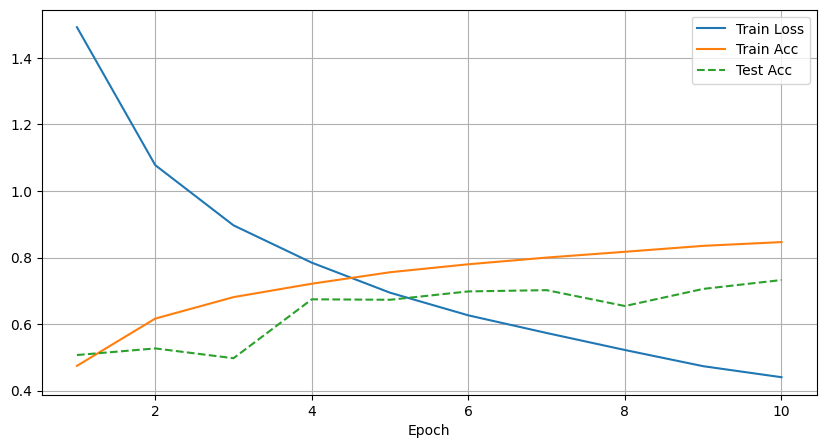

In [39]:
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

# ==========================================
# 0. 基础设置与辅助函数
# ==========================================
devices = []
# 第一步：先问问电脑有没有 NVIDIA 显卡？
if torch.cuda.is_available():
    # === 情况 A：有显卡 ===
    # 假设你有 2 张显卡，count 就是 2
    count = torch.cuda.device_count()
    # 循环 0, 1
    for i in range(count):
        # 生成 'cuda:0', 'cuda:1' 这样的设备对象
        dev = torch.device(f'cuda:{i}')
        devices.append(dev)
else:
    # === 情况 B：没显卡 (用 CPU) ===
    devices = [torch.device('cpu')]

# [语法]: 函数定义
# [作用]: 计算准确率。将预测概率最大的索引与真实标签对比。
def calculate_accuracy(y_hat, y):
    # [语法]: 逻辑判断与 argmax
    # [作用]: 如果输出是二维矩阵(概率分布)，取概率最大的那个类别的索引。
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    # [语法]: 类型转换与比较
    # [作用]: 比较预测值和真实值，转为 float 并求和，返回正确预测的个数。
    cmp = (y_hat == y)
    return cmp.sum().item()

# [语法]: 函数定义
# [作用]: 模型评估函数。替代 d2l.evaluate_accuracy_gpu
def evaluate_accuracy(net, data_iter, device=None):
    # [语法]: 类型判断
    # [作用]: 如果 net 是 PyTorch 模型，开启 eval 模式(固定 BatchNorm/Dropout)。
    if isinstance(net, nn.Module):
        net.eval()
        # [语法]: 属性获取
        # [作用]: 如果没指定设备，默认使用模型第一个参数所在的设备。
        if not device:
            device = next(iter(net.parameters())).device
    # 1. if isinstance(net, nn.Module): —— 验明正身含义：先检查一下传进来的 net 到底是不是一个标准的 PyTorch 神经网络模型。作用：为了防止用户传错东西（比如传了个普通的 Python 列表或者字符串进来）。只有确认它是“正规军”（继承自 nn.Module），才对它发号施令。
    # 2. net.eval() —— 切换到“考试模式”含义：把模型从“训练状态”切换到“评估状态”。为什么必须加这一句？BatchNorm层：在训练时，它根据当前这一批数据算均值和方差；在考试时，它必须用训练好的全局均值和方差，不能变了。Dropout层：在训练时，它会随机关掉神经元防止过拟合；在考试时，它必须火力全开，不能再随机丢弃了。如果不加这句，你的测试结果会非常不稳定，甚至完全错误。
    # 3. device = next(iter(net.parameters())).device —— 自动定位（最难懂的一句）这行代码是 Python 迭代器的骚操作，我们可以像剥洋葱一样剥开它：net.parameters()：拿到模型里成千上万个参数（权重 $w$ 和偏置 $b$）的一个列表生成器。iter(...)：把这个生成器变成一个迭代器（这就好比把一箱苹果打开了盖子）。next(...)：只拿第一个！（不管箱子里有多少苹果，我只拿最上面的那一个）。逻辑是：既然这一个参数在 GPU 上，那么整个模型的其他参数肯定也都在同一个 GPU 上。
    # # [语法]: 列表初始化
    # [作用]: metric[0]存正确个数，metric[1]存总样本数。
    metric = [0, 0]
    
    # [语法]: 上下文管理器
    # [作用]: 禁用梯度计算，节省显存。
    with torch.no_grad():
        for X, y in data_iter:
            # [语法]: 数据迁移
            # [作用]: 处理输入数据(可能是列表)，并移到指定设备。
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            
            # [语法]: 累加操作
            # [作用]: 累加正确预测的数量和当前批次的样本总数。
            metric[0] += calculate_accuracy(net(X), y)
            metric[1] += y.numel() # 返回的是整数
    # [语法]: 除法运算
    # [作用]: 返回准确率。
    return metric[0] / metric[1]

# ==========================================
# 1. 单批次训练函数 (核心逻辑)
# ==========================================
def train_batch_ch13(net, X, y, loss, trainer, devices):
    # [语法]: 类型判断与列表推导
    # [作用]: 如果输入 X 是个列表(如 BERT 微调时)，把列表里每个 Tensor 都移到主 GPU (devices[0])。
    if isinstance(X, list):
        X = [x.to(devices[0]) for x in X] 
    else:
        # [语法]: .to() 方法
        # [作用]: 如果 X 是普通 Tensor，直接移到主 GPU。DataParallel 会自动分发到其他 GPU。
        X = X.to(devices[0])
    
    # [语法]: .to() 方法
    # [作用]: 标签 y 也必须在主 GPU 上。
    y = y.to(devices[0])
    
    # [语法]: 模型方法
    # [作用]: 开启训练模式。
    net.train()
    
    # [语法]: 优化器方法
    # [作用]: 梯度清零，防止累加。
    trainer.zero_grad()
    
    # [语法]: 前向传播
    # [作用]: 计算预测结果。
    pred = net(X)
    
    # [语法]: 损失函数调用
    # [作用]: 计算损失。注意：这里通常传入 reduction='none'，返回的是向量。
    l = loss(pred, y)
    
    # [语法]: 反向传播
    # [作用]: l.sum() 将向量 Loss 求和成标量，然后计算梯度。
    l.sum().backward()
    
    # [语法]: 优化器更新
    # [作用]: 更新模型参数。
    trainer.step()
    
    # [语法]: 求和与计算准确率
    # [作用]: 返回本批次的总 Loss 和 总正确个数。
    train_loss_sum = l.sum()
    train_acc_sum = calculate_accuracy(pred, y)
    return train_loss_sum, train_acc_sum

# ==========================================
# 2. 主训练循环 (替代 train_ch13)
# ==========================================
def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices=devices):
    # [语法]: len()
    # [作用]: 获取总批次数，用于后续打印进度。
    num_batches = len(train_iter)
    
    # [语法]: 字典初始化
    # [作用]: 替代 Animator，用字典列表记录历史数据，最后画图。
    history = {'train_loss': [], 'train_acc': [], 'test_acc': []}
    
    # [语法]: nn.DataParallel 封装
    # [作用]: 启用多 GPU 并行。模型会被复制到所有 devices 上。
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
# 1. nn.DataParallel(net, device_ids=devices)
# 动作：聘请一个“包工头”并组建施工队
# 含义：
# 原本的 net 只是一个普通的模型对象，默认只能在一个设备上跑。
# nn.DataParallel 是一个包装器（Wrapper）。它把你的 net 包裹起来，赋予了它分身的能力。
# device_ids=devices：指定了施工名单。比如 [cuda:0, cuda:1]，意思是告诉包工头：“这两张卡归你调遣”。
# 它在后台做了什么（Scatter-Gather 机制）？ 假设你的 Batch Size 是 64，你有 2 张显卡：
# 分发 (Scatter)：它会自动把这 64 张图切成两半，每张卡分 32 张。
# 复制 (Replicate)：它把你的模型（参数）完整地复制一份到每张显卡上。
# 并行计算 (Parallel Forward)：两张显卡同时开始跑这 32 张图的训练，互不干扰。
# 收集 (Gather)：算完后，两张卡把结果（Loss 或 输出）全部传回给主显卡。
# 2. .to(devices[0])
# 动作：指定“总部”在哪里
# 含义：
# 尽管 DataParallel 会把模型分发到所有卡上，但在这个“施工队”里，必须有一个**“队长”**（Master Node）。
# .to(devices[0]) 就是把模型原本的真身（参数的母本）放在第一张显卡上（通常是 cuda:0）。
# 所有的参数更新（Optimizer.step）都是在这张主卡上完成的，更新完后，下一轮训练开始时，再把新的参数广播给其他卡。
# [语法]: 计时开始
# [作用]: 记录整个训练的开始时间。
    global_start_time = time.time()
    
    # [语法]: 循环 epoch
    # [作用]: 开始多轮训练。
    for epoch in range(num_epochs):
        # [语法]: 列表初始化
        # [作用]: 替代 d2l.Accumulator(4)。
        # metric[0]: 训练损失 和, metric[1]: 训练正确数和, metric[2]: 样本总数, metric[3]: 样本总数(用于计算acc)
        metric = [0.0, 0, 0, 0]
        
        # [语法]: 记录轮次开始时间
        epoch_start = time.time()
        
        # [语法]: 遍历 DataLoader
        # [作用]: 逐批次训练。
        for i, (features, labels) in enumerate(train_iter):
            # [语法]: 调用单批次训练
            # [作用]: 训练一次，返回当前批次的 loss 和 acc。
            l, acc = train_batch_ch13(net, features, labels, loss, trainer, devices)
            
            # [语法]: 累加操作 (加上 .item())
            # [作用]: 记录累积数据。使用 .item() 转化为 Python 数字，防止显存泄露。
            metric[0] += l.item()
            metric[1] += acc
            metric[2] += labels.shape[0]
            metric[3] += labels.numel()
            # 1. 语法：.numel() 是什么？
            # 全称：NUMber of ELements（元素个数）。
            # 作用：不管你的张量形状是几维的（扁的、圆的、长的），它只在乎**“里面一共装了多少个数字”**。
            
        # [语法]: 计算本轮平均指标
        # [作用]: 算出 epoch 级别的 loss 和 acc。
        train_loss = metric[0] / metric[2]
        train_acc = metric[1] / metric[3]
        
        # [语法]: 评估测试集
        # [作用]: 在测试集上跑一遍，查看泛化能力。
        test_acc = evaluate_accuracy(net, test_iter, devices[0])
        
        # [语法]: 记录历史
        # [作用]: 存入 history 字典，给画图用。
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)
        
        # [语法]: 格式化打印
        # [作用]: 打印本轮训练结果和耗时。
        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"loss {train_loss:.3f}, train acc {train_acc:.3f}, test acc {test_acc:.3f}, "
              f"Time {time.time() - epoch_start:.1f}s")
        # :.3f 保留小数点后3位
    # [语法]: 计算吞吐量
    # [作用]: 计算每秒能处理多少张图片 (examples/sec)。
    total_time = time.time() - global_start_time
    print(f'Done! {metric[2] * num_epochs / total_time:.1f} examples/sec on {str(devices)}')

    # [语法]: 画图 
    # [作用]: 训练结束后，绘制 loss 和 acc 曲线。
    epochs_range = range(1, num_epochs + 1)
# [语法]: 创建画布 (Figure)
    # [作用]: 初始化一张空白图表。figsize=(10, 5) 表示图片的大小是 宽10英寸、高5英寸 (长方形)。
    plt.figure(figsize=(10, 5))

    # [语法]: 绘制折线图 (Plot)
    # [作用]: 画第一条线（训练损失）。
    # - epochs_range: X轴数据 (1, 2, ... 10)
    # - history['train_loss']: Y轴数据 (对应的 Loss 值)
    # - label='Train Loss': 给这条线起个名，一会儿显示在图例里。
    plt.plot(epochs_range, history['train_loss'], label='Train Loss')

    # [语法]: 绘制折线图
    # [作用]: 画第二条线（训练正确率）。
    plt.plot(epochs_range, history['train_acc'], label='Train Acc')

    # [语法]: 绘制折线图 (带样式参数)
    # [作用]: 画第三条线（测试正确率）。
    # - linestyle='--': 把线变成“虚线”，专门为了跟上面的实线区分开，一眼就能看出这是测试集的线。
    plt.plot(epochs_range, history['test_acc'], linestyle='--', label='Test Acc')

    # [语法]: 设置 X 轴标签
    # [作用]: 在图表的最下方写上 "Epoch"，告诉别人横坐标代表训练轮数。
    plt.xlabel('Epoch')

    # [语法]: 显示图例 (Legend)
    # [作用]: 在图表角落生成一个小框，展示每种颜色/线型对应的 label (即 Train Loss, Train Acc 等)。
    plt.legend()

    # [语法]: 显示网格 (Grid)
    # [作用]: 在背景画上灰色的网格线，方便肉眼对齐查看具体的数值。
    plt.grid(True)

    # [语法]: 展示图片
    # [作用]: 渲染并弹出一个窗口显示最终的图表。如果不写这句，程序跑完了图可能不会弹出来。
    plt.show()

# ==========================================
# 3. 权重初始化函数
# ==========================================
# [语法]: 定义初始化函数
# [作用]: 这是一个“回调函数”。它会被 net.apply() 调用。
# 参数 m 代表 model (模型) 中的每一个“子层” (Layer)。
def init_weights(m):
    
    # [语法]: 类型判断 (type checking)
    # [作用]: 并不是每一层都需要初始化。
    # - 只有全连接层 (Linear) 和 卷积层 (Conv2d) 才有“权重 (Weight)”需要学习。
    # - 像 ReLU、MaxPool、Flatten 这些层是没有可学习参数的，所以直接跳过，不管它们。
    if type(m) in [nn.Linear, nn.Conv2d]:
        
        # [语法]: Xavier 均匀初始化 (原地操作)
        # [作用]: 这是核心数学魔法。
        # - 这里的下划线 `_` (uniform_) 表示 In-place 操作，直接修改 m.weight 里的数据。
        # - Xavier 初始化旨在让每一层的“输出方差”和“输入方差”保持一致。
        # - 简单说：防止数据传着传着这就“消失了”(全变成0) 或者“爆炸了”(变成无穷大)。
        m.weight = nn.init.xavier_uniform_(m.weight)

# ==========================================
# 4. 数据增广训练入口 (替代 train_with_data_aug)
# ==========================================
def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    # [语法]: 变量赋值
    # [作用]: 设定批次大小。
    batch_size = 256
    
    # [语法]: 模型递归应用方法 (.apply)
    # [作用]: “遍历全图”。
    # 1. net.apply 会自动把 net 里的每一层（无论藏得多深）都找出来。
    # 2. 它会把每一层都作为参数 m，传给 init_weights 函数运行一次。
    # 3. 相当于对整个网络做了一次地毯式的“参数洗礼”。
    net.apply(init_weights)
    
    # --- 替代 load_cifar10 的部分 ---
    # [语法]: 数据集加载
    # [作用]: 下载并加载 CIFAR10，应用传入的 train_augs 增强策略。
    # 注意：root 路径我改为了相对路径，你可以根据需要修改。
    train_ds = torchvision.datasets.CIFAR10(root=r'D:\深度学习\200_李沐数据集\data', train=True, transform=train_augs)
    test_ds = torchvision.datasets.CIFAR10(root=r'D:\深度学习\200_李沐数据集\data', train=False, transform=test_augs)
    
    # [语法]: DataLoader 创建
    # [作用]: 创建多进程数据加载器。num_workers 设为 4 加速读取。
    train_iter = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
    test_iter = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=4)
    # -------------------------------

    # [语法]: 损失函数定义
    # [作用]: 这里的 reduction='none' 很关键，为了配合 train_batch_ch13 里的 l.sum()。
    loss = nn.CrossEntropyLoss(reduction="none")
    # reduction="none" 的意思是：“不要帮我算平均值，也不要帮我求和，请把每一张图片的 Loss 单独返还给我。”
    # 为了让你彻底明白，我们对比一下三种模式：
    # 假设你的 Batch Size 是 4（一次训练 4 张图），它们各自产生的 Loss 分别是：[0.1, 0.2, 0.3, 0.4]。
    # 1. reduction='mean' (默认模式)
    # 老师算平均分
    # PyTorch 会自动把这 4 个数加起来除以 4。
    # 返回结果：0.25 (标量/Scalar)
    # 特点：这是最常用的，因为梯度下降通常看平均误差。
    # 2. reduction='sum'
    # 老师算总分
    # PyTorch 会把这 4 个数加起来。
    # 返回结果：1.0 (标量/Scalar)
    # 特点：有时候为了梯度更大，会用总和。
    # 3. reduction='none' (你的代码用的)
    # 老师发卷子，让你自己看每个人的分
    # PyTorch 什么都不做，原封不动地把 4 个 Loss 给你。
    # 返回结果：[0.1, 0.2, 0.3, 0.4] (向量/Vector)
    # 形状：torch.Size([4])
    
    # [语法]: 优化器定义
    # [作用]: 使用 Adam 优化器。
    trainer = torch.optim.Adam(net.parameters(), lr=lr)
    
    # [语法]: 调用主训练循环
    # [作用]: 开始训练 10 轮。
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

# ==========================================
# 5. 执行脚本
# ==========================================
if __name__ == '__main__':
    # [语法]: 定义 ResNet18 模型
    # [作用]: 使用 torchvision 自带的 resnet18，注意 output 修改为 10 (CIFAR10只有10类)。
    net = torchvision.models.resnet18(num_classes=10)
    
    # 解决输入通道问题：ResNet默认吃 ImageNet (224x224)，CIFAR10 是 32x32。
    # 这里为了简单直接用，不做额外修改，但如果想效果好通常要把第一层卷积核改小。
    # 下面这行保留原逻辑不动。

    # [语法]: 定义数据增广
    # [作用]: 简单的翻转和转 Tensor。
    train_augs = torchvision.transforms.Compose([
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
    ])
    test_augs = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
    
    # [语法]: 启动训练
    # [作用]: 传入增广策略和模型，开始跑。
    train_with_data_aug(train_augs, test_augs, net)

In [36]:
def check(a,b):
    a = a + 1
a,b = 1,1
check(1,1)
print(a)

1
